In [6]:
import pandas as pd
import convenient_methods as c_m
import convenient_lists as c_l
import linkedIn_scraper
import emoji
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
##  Panda Methods ##



Make Folders, and then Scrape Data

Run if you want to check out the scraping process, etc.


In [ ]:
## Test Scraper ##
## Please only use characters that are acceptable to file names as an input. ##
## Should just use a number in the search quantity as well ##
c_m.create_folders()

search_input = input("Put in what you are looking for?")
search_quantity = int(input("At least, how many posts do you want to scrape?"))

scraping = True
while scraping:
    driver = linkedIn_scraper.scraper_log_in()
    linkedIn_scraper.search_and_scrape(search_input,search_quantity,driver)
    linkedIn_scraper.scraper_log_out(driver)
    scraping = False
search_input_list = [search_input]
c_m.json_organizer(search_input_list,search_input)
cleaned_posts_list = c_m.CSV_duplicate_finder(search_input_list,f'{search_input}_cleaned')
c_m.emoji_organizer(cleaned_posts_list,search_input)

In [ ]:
## Scraper used for project ##

c_m.create_folders()

scraping = True
while scraping:
    driver = linkedIn_scraper.scraper_log_in()
    for search in c_l.search_list:
        linkedIn_scraper.search_and_scrape(search,100,driver)
        print(f'{search} complete!')
    scraping = False
linkedIn_scraper.scraper_log_out(driver)

Converting JSONs to CSVs, cause i like them more.

In [ ]:
c_m.json_organizer(c_l.resume_json,'resume tips.csv')
c_m.json_organizer(c_l.interview_tips_json,'interview tips.csv')
c_m.json_organizer(c_l.data_analysis_tips_json,'data analysis tips.csv')
c_m.json_organizer(c_l.job_tips_json,'job tips.csv')

In [ ]:
## If wanting to run the duplicate finder one individual file, you can use this method ##
c_m.CSV_duplicate_finder(['resume tips'],'cleaned_resume_tips')
c_m.CSV_duplicate_finder(['interview tips'],'cleaned_interview_tips')
c_m.CSV_duplicate_finder(['data analysis tips'],'cleaned_data_analysis_tips')
c_m.CSV_duplicate_finder(['job tips'],'cleaned_job_tips')


In [ ]:
## We want to pull the emojis from all NON DUPLICATED posts ##

post_list = c_m.CSV_duplicate_finder(c_l.csv_list,'All_Posts.csv')
c_m.emoji_organizer(post_list,"ALL_EMOJI_LIST")
print(2436 - 1506)

All_Posts.csv has 1506 duplicates of 2436 posts
ALL_EMOJI_LIST.csv has been created
930


In [9]:
df = pd.read_csv('Data_CSV/ALL_EMOJI_LIST.csv',header=None)

df.head()


,0,1,2,3,4,5,6,7,8,9,...,3076,3077,3078,3079,3080,3081,3082,3083,3084,3085
0,🔹,✅,✅,✅,✅,🚀,🔹,✅,✅,✅,...,5️⃣,6️⃣,💡,🚀,❗,🚀,💼,✨,🔑,👉


### Getting the names for emojis

In [23]:
emoji_string = " ".join(df.iloc[0])

unique_emojis = list(set(char for char in emoji_string if emoji.is_emoji(char)))

emoji_names = {e: emoji.demojize(e).strip(":").replace("_", " ").title() for e in set(emoji_string) if emoji.is_emoji(e)}

emoji_named_df = pd.DataFrame([unique_emojis], columns=emoji_names)

print(emoji_names)
emoji_named_df


{'🚩': 'Triangular Flag', '✨': 'Sparkles', '😬': 'Grimacing Face', '🚀': 'Rocket', '🔗': 'Link', '📲': 'Mobile Phone With Arrow', '🤹': 'Person Juggling', '🫶': 'Heart Hands', '📍': 'Round Pushpin', '💡': 'Light Bulb', '⏳': 'Hourglass Not Done', '😰': 'Anxious Face With Sweat', '👥': 'Busts In Silhouette', '❤': 'Red Heart', '👏': 'Clapping Hands', '➕': 'Plus', '✂': 'Scissors', '🫂': 'People Hugging', '👉': 'Backhand Index Pointing Right', '🛠': 'Hammer And Wrench', '👦': 'Boy', '⤵': 'Right Arrow Curving Down', '❗': 'Red Exclamation Mark', '🏽': 'Medium Skin Tone', '👍': 'Thumbs Up', '💼': 'Briefcase', '🌀': 'Cyclone', '▪': 'Black Small Square', '✔': 'Check Mark', '⚽': 'Soccer Ball', '⭐': 'Star', '💪': 'Flexed Biceps', '😲': 'Astonished Face', '👐': 'Open Hands', '🌞': 'Sun With Face', '👕': 'T-Shirt', '🌍': 'Globe Showing Europe-Africa', '😃': 'Grinning Face With Big Eyes', '🕒': 'Three O’Clock', '➡': 'Right Arrow', '🌊': 'Water Wave', '📣': 'Megaphone', '🖋': 'Fountain Pen', '🏼': 'Medium-Light Skin Tone', '⏰': 'Ala

,🚩,✨,😬,🚀,🔗,📲,🤹,🫶,📍,💡,...,🤔,🙌,🐍,📁,🔊,☑,✈,📉,💻,🎖
0,🚩,✨,😬,🚀,🔗,📲,🤹,🫶,📍,💡,...,🤔,🙌,🐍,📁,🔊,☑,✈,📉,💻,🎖


In [24]:
sorted_emoji = {name: [] for name in emoji_names.values()}  
not_sorted_emoji = []

for char in emoji_string:
    if char in emoji_names:
        sorted_emoji[emoji_names[char]].append(char)
    else:
        not_sorted_emoji.append(char)
        
# Thanks CHATGPT!
max_length = max(len(val) for val in sorted_emoji.values())

for key in sorted_emoji:
    sorted_emoji[key] += [pd.NA] * (max_length - len(sorted_emoji[key]))

print(sorted_emoji)


sorted_emoji_df = pd.DataFrame(sorted_emoji)

sorted_emoji_df.head()

{'Triangular Flag': ['🚩', '🚩', '🚩', '🚩', '🚩', '🚩', '🚩', '🚩', <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA

,Triangular Flag,Sparkles,Grimacing Face,Rocket,Link,Mobile Phone With Arrow,Person Juggling,Heart Hands,Round Pushpin,Light Bulb,...,Thinking Face,Raising Hands,Snake,File Folder,Speaker High Volume,Check Box With Check,Airplane,Chart Decreasing,Laptop,Military Medal
0,🚩,✨,😬,🚀,🔗,📲,🤹,🫶,📍,💡,...,🤔,🙌,🐍,📁,🔊,☑,✈,📉,💻,🎖
1,🚩,✨,😬,🚀,🔗,<NA>,<NA>,<NA>,📍,💡,...,🤔,🙌,🐍,📁,<NA>,☑,<NA>,📉,💻,🎖
2,🚩,✨,😬,🚀,🔗,<NA>,<NA>,<NA>,📍,💡,...,🤔,🙌,<NA>,📁,<NA>,☑,<NA>,📉,💻,🎖
3,🚩,✨,😬,🚀,🔗,<NA>,<NA>,<NA>,<NA>,💡,...,🤔,🙌,<NA>,<NA>,<NA>,☑,<NA>,📉,💻,<NA>
4,🚩,✨,<NA>,🚀,🔗,<NA>,<NA>,<NA>,<NA>,💡,...,🤔,🙌,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,💻,<NA>


In [25]:


emoji_sums_df = pd.DataFrame(sorted_emoji_df.notna().sum()).reset_index()
emoji_sums_df.rename(columns={'index':'Emoji Name',0:'Time(s) Used'},inplace=True)


emoji_sums_df['Emoji Icon'] = emoji_sums_df['Emoji Name'].map({v: k for k, v in emoji_names.items()})

top_ten_emojis = emoji_sums_df.sort_values(by='Time(s) Used',ascending=False)

top_ten_emojis = top_ten_emojis[['Emoji Name','Emoji Icon','Time(s) Used']]

top_ten_emojis.head(10)

,Emoji Name,Emoji Icon,Time(s) Used
72,Check Mark Button,✅,485
3,Rocket,🚀,182
9,Light Bulb,💡,149
117,Small Blue Diamond,🔹,131
86,Cross Mark,❌,107
181,Backhand Index Pointing Down,👇,81
1,Sparkles,✨,77
28,Check Mark,✔,77
176,Bar Chart,📊,75
18,Backhand Index Pointing Right,👉,67


In [32]:
bullet_point_filtered_df = emoji_sums_df[~emoji_sums_df['Emoji Icon'].isin(c_l.bullet_point_emojis)]
bullet_point_filtered_df.sort_values(by='Time(s) Used',ascending=False,inplace=True)
bullet_point_filtered_df.head(10)

C:\Users\Awdam\AppData\Local\Temp\ipykernel_12492\3051239623.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bullet_point_filtered_df.sort_values(by='Time(s) Used',ascending=False,inplace=True)


,Emoji Name,Time(s) Used,Emoji Icon
50,Rocket,182,🚀
96,Light Bulb,149,💡
112,Backhand Index Pointing Down,81,👇
4,Check Mark,77,✔
132,Bar Chart,75,📊
172,Backhand Index Pointing Right,67,👉
215,Briefcase,65,💼
218,Glowing Star,64,🌟
210,Bullseye,61,🎯
19,Speech Balloon,57,💬


In [33]:
sorted_emoji_df.to_csv("emoji_data_frame.csv",sep=',',index=False)
top_ten_emojis.to_csv("top_ten_emojis.csv",sep=',',index=False)
bullet_point_filtered_df.to_csv("bullet_points_removed.csv", sep='1',index=False)


#Word Cloud

{'✅': 485, '🚀': 182, '💡': 149, '🔹': 131, '❌': 107, '👇': 81, '✨': 77, '✔': 77, '📊': 75, '👉': 67, '💼': 65, '🌟': 64, '🎯': 61, '💬': 57, '🔍': 53, '📌': 52, '➡': 41, '♻': 37, '🔥': 36, '📈': 34, '🚨': 31, '⬇': 23, '💪': 23, '🤔': 22, '📄': 22, '📝': 22, '🔑': 18, '💻': 17, '🔗': 17, '🚫': 17, '👍': 15, '🔴': 14, '⚠': 13, '🔸': 13, '🏻': 13, '🔄': 12, '📩': 12, '❓': 12, '🧠': 11, '🤖': 11, '🟢': 11, '💥': 10, '🤝': 10, '📚': 9, '🔔': 9, '📢': 9, '❤': 9, '🔟': 9, '🚩': 8, '👋': 8, '✉': 8, '🛠': 8, '🌐': 8, '🎓': 7, '✍': 7, '🙌': 7, '♀': 6, '➕': 6, '💯': 6, '😎': 6, '📜': 5, '👀': 5, '💎': 5, '⏰': 5, '▪': 5, '🏆': 5, '🔎': 5, '😬': 4, '📂': 4, '⭐': 4, '😅': 4, '🕵': 4, '😊': 4, '🌍': 4, '🧡': 4, '⚡': 4, '🌀': 4, '🏽': 4, '😁': 4, '👩': 4, '😉': 4, '🗣': 4, '🛡': 4, '⚙': 4, '☑': 4, '📉': 4, '👨': 4, '👔': 4, '🩺': 3, '🎁': 3, '✂': 3, '⏳': 3, '🧿': 3, '📍': 3, '✌': 3, '⁉': 3, '🎖': 3, '😂': 3, '🤯': 3, '🔖': 3, '♂': 3, '📖': 3, '🌱': 3, '🛑': 3, '🥲': 3, '📁': 3, '😱': 3, '📧': 3, '👗': 3, '🕒': 3, '🧑': 2, '📥': 2, '🐍': 2, '✳': 2, '🏀': 2, '🙋': 2, '☺': 2, '🎨': 2, '💁': 2,

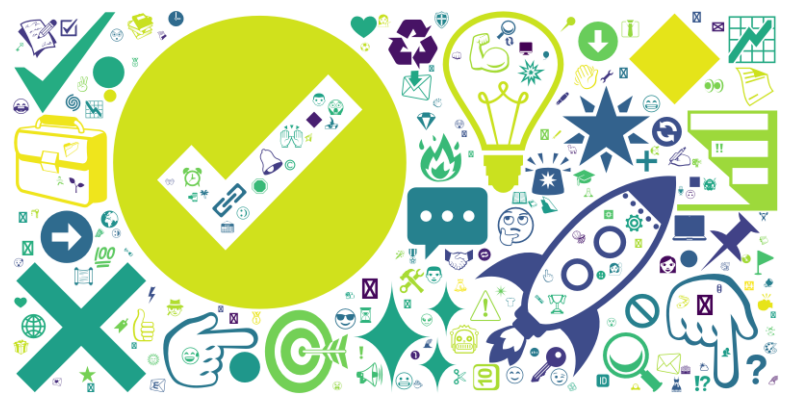

In [37]:
emoji_frequencies = top_ten_emojis.set_index("Emoji Icon")["Time(s) Used"].to_dict()
print(emoji_frequencies)
wordcloud = WordCloud(font_path="EmojiOneBW.otf", width=800,height=400,background_color="white")

wordcloud.generate_from_frequencies(emoji_frequencies)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()